In [5]:
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt

In [6]:
Data = pd.read_csv('DataSet.csv', encoding='latin-1')
del Data['Outcome']
Data.head()

,x,y,z,d_x,d_y,d_z,fi,thetta,psi,d_fi,d_thetta,d_psi
0,-0.000044,-0.000178,-8.530000e-07,0.000044,0.000179,0.000006,-0.000018,0.000004,-0.000034,0.000018,-0.000004,0.000036
1,-0.110163,-0.096615,-1.051294e-01,-0.064434,-0.167006,-0.087618,-0.098391,-0.106327,-0.107474,0.851331,0.363000,-0.067917
2,-0.095329,-0.138420,-1.092485e-01,-0.008426,-0.113839,-0.054063,-0.044755,-0.066786,-0.104042,0.256113,0.125095,-0.032683
3,-0.111484,-0.102172,-1.075137e-01,-0.034207,-0.193541,-0.075497,-0.074116,-0.095515,-0.109110,0.786031,0.358000,-0.048139
4,-0.001287,-0.076536,-2.901535e-02,0.176885,0.006595,0.141945,0.105398,0.069049,0.007679,0.288711,0.237738,0.121593


In [7]:
"""
# Метод главных компонент PCA - уменьшаем размерность данных
data_numpy = Data.to_numpy() # Конвертация в numpy массив
data_features = data_numpy[:,:12]

from sklearn.decomposition import PCA

pca = PCA(n_components = 11, svd_solver='full') #Создание объекта класса PCA. В качестве параметров выступает количество ГК и метод оптимизации
#data_features_transformed = pca.fit(data_features).transform(data_features) # С учетом 11 компонент
data_features_transformed = pca.fit(data_features)

# Найдем долю объясненной дисперсии в зависимости от количества используемых ГК.
explained_variance = np.round(np.cumsum(pca.explained_variance_ratio_), 3)

# Построим график зависимости доли объясненной дисперсии от количества используемых ГК
plt.plot(np.arange(11), explained_variance, ls = '-')
"""

"\n# Метод главных компонент PCA - уменьшаем размерность данных\ndata_numpy = Data.to_numpy() # Конвертация в numpy массив\ndata_features = data_numpy[:,:12]\n\nfrom sklearn.decomposition import PCA\n\npca = PCA(n_components = 11, svd_solver='full') #Создание объекта класса PCA. В качестве параметров выступает количество ГК и метод оптимизации\n#data_features_transformed = pca.fit(data_features).transform(data_features) # С учетом 11 компонент\ndata_features_transformed = pca.fit(data_features)\n\n# Найдем долю объясненной дисперсии в зависимости от количества используемых ГК.\nexplained_variance = np.round(np.cumsum(pca.explained_variance_ratio_), 3)\n\n# Построим график зависимости доли объясненной дисперсии от количества используемых ГК\nplt.plot(np.arange(11), explained_variance, ls = '-')\n"

In [8]:
"""
# Преобразованный массив признаков по методу PCA
pca = PCA(n_components = 4, svd_solver='full') 
data_features_transformed = pca.fit(data_features).transform(data_features) # С учетом 3 компонент
data_features = pd.DataFrame(data_features_transformed) # из numpy --> pandas 
data_features
"""

"\n# Преобразованный массив признаков по методу PCA\npca = PCA(n_components = 4, svd_solver='full') \ndata_features_transformed = pca.fit(data_features).transform(data_features) # С учетом 3 компонент\ndata_features = pd.DataFrame(data_features_transformed) # из numpy --> pandas \ndata_features\n"

In [9]:
data_features = Data[['x','d_x','fi','d_fi']]
#train_Data = train_Data_pre[['x','y','z','d_x','d_y','d_z','fi','thetta','psi','d_fi','d_thetta','d_psi']]
data_features.head()

,x,d_x,fi,d_fi
0,-0.000044,0.000044,-0.000018,0.000018
1,-0.110163,-0.064434,-0.098391,0.851331
2,-0.095329,-0.008426,-0.044755,0.256113
3,-0.111484,-0.034207,-0.074116,0.786031
4,-0.001287,0.176885,0.105398,0.288711


In [10]:
# Нормализация данных
from sklearn import preprocessing
normalization = preprocessing.StandardScaler()
normalization.fit(data_features)
data_features = normalization.transform(data_features)
data_features = pd.DataFrame(data = data_features)  # Перевод из numpy ---> pandas
data_features

,0,1,2,3
0,0.278677,-0.021131,0.006523,-0.011881
1,-0.244164,-0.041066,-0.635549,0.235199
2,-0.173733,-0.023750,-0.285470,0.062446
3,-0.250438,-0.031721,-0.477105,0.216247
4,0.272774,0.033546,0.694562,0.071907
...,...,...,...,...
7500,1.515297,0.510817,2.314410,-0.098258
7501,0.260078,-0.019922,-0.004305,-0.011390
7502,0.264506,-0.020208,-0.001670,-0.011507
7503,0.201686,-0.015913,-0.033896,-0.010252


In [11]:
# Hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
link = linkage(data_features, 'ward', 'euclidean')

In [12]:
link[:7505]

array([[4.73100000e+03, 4.80200000e+03, 0.00000000e+00, 2.00000000e+00],
       [1.53200000e+03, 1.81300000e+03, 1.08569106e-08, 2.00000000e+00],
       [5.76000000e+02, 5.22300000e+03, 1.08569107e-08, 2.00000000e+00],
       ...,
       [1.49820000e+04, 1.50040000e+04, 8.77565756e+01, 4.22100000e+03],
       [1.50050000e+04, 1.50060000e+04, 1.02478759e+02, 7.41700000e+03],
       [1.49890000e+04, 1.50070000e+04, 1.17716840e+02, 7.50500000e+03]])

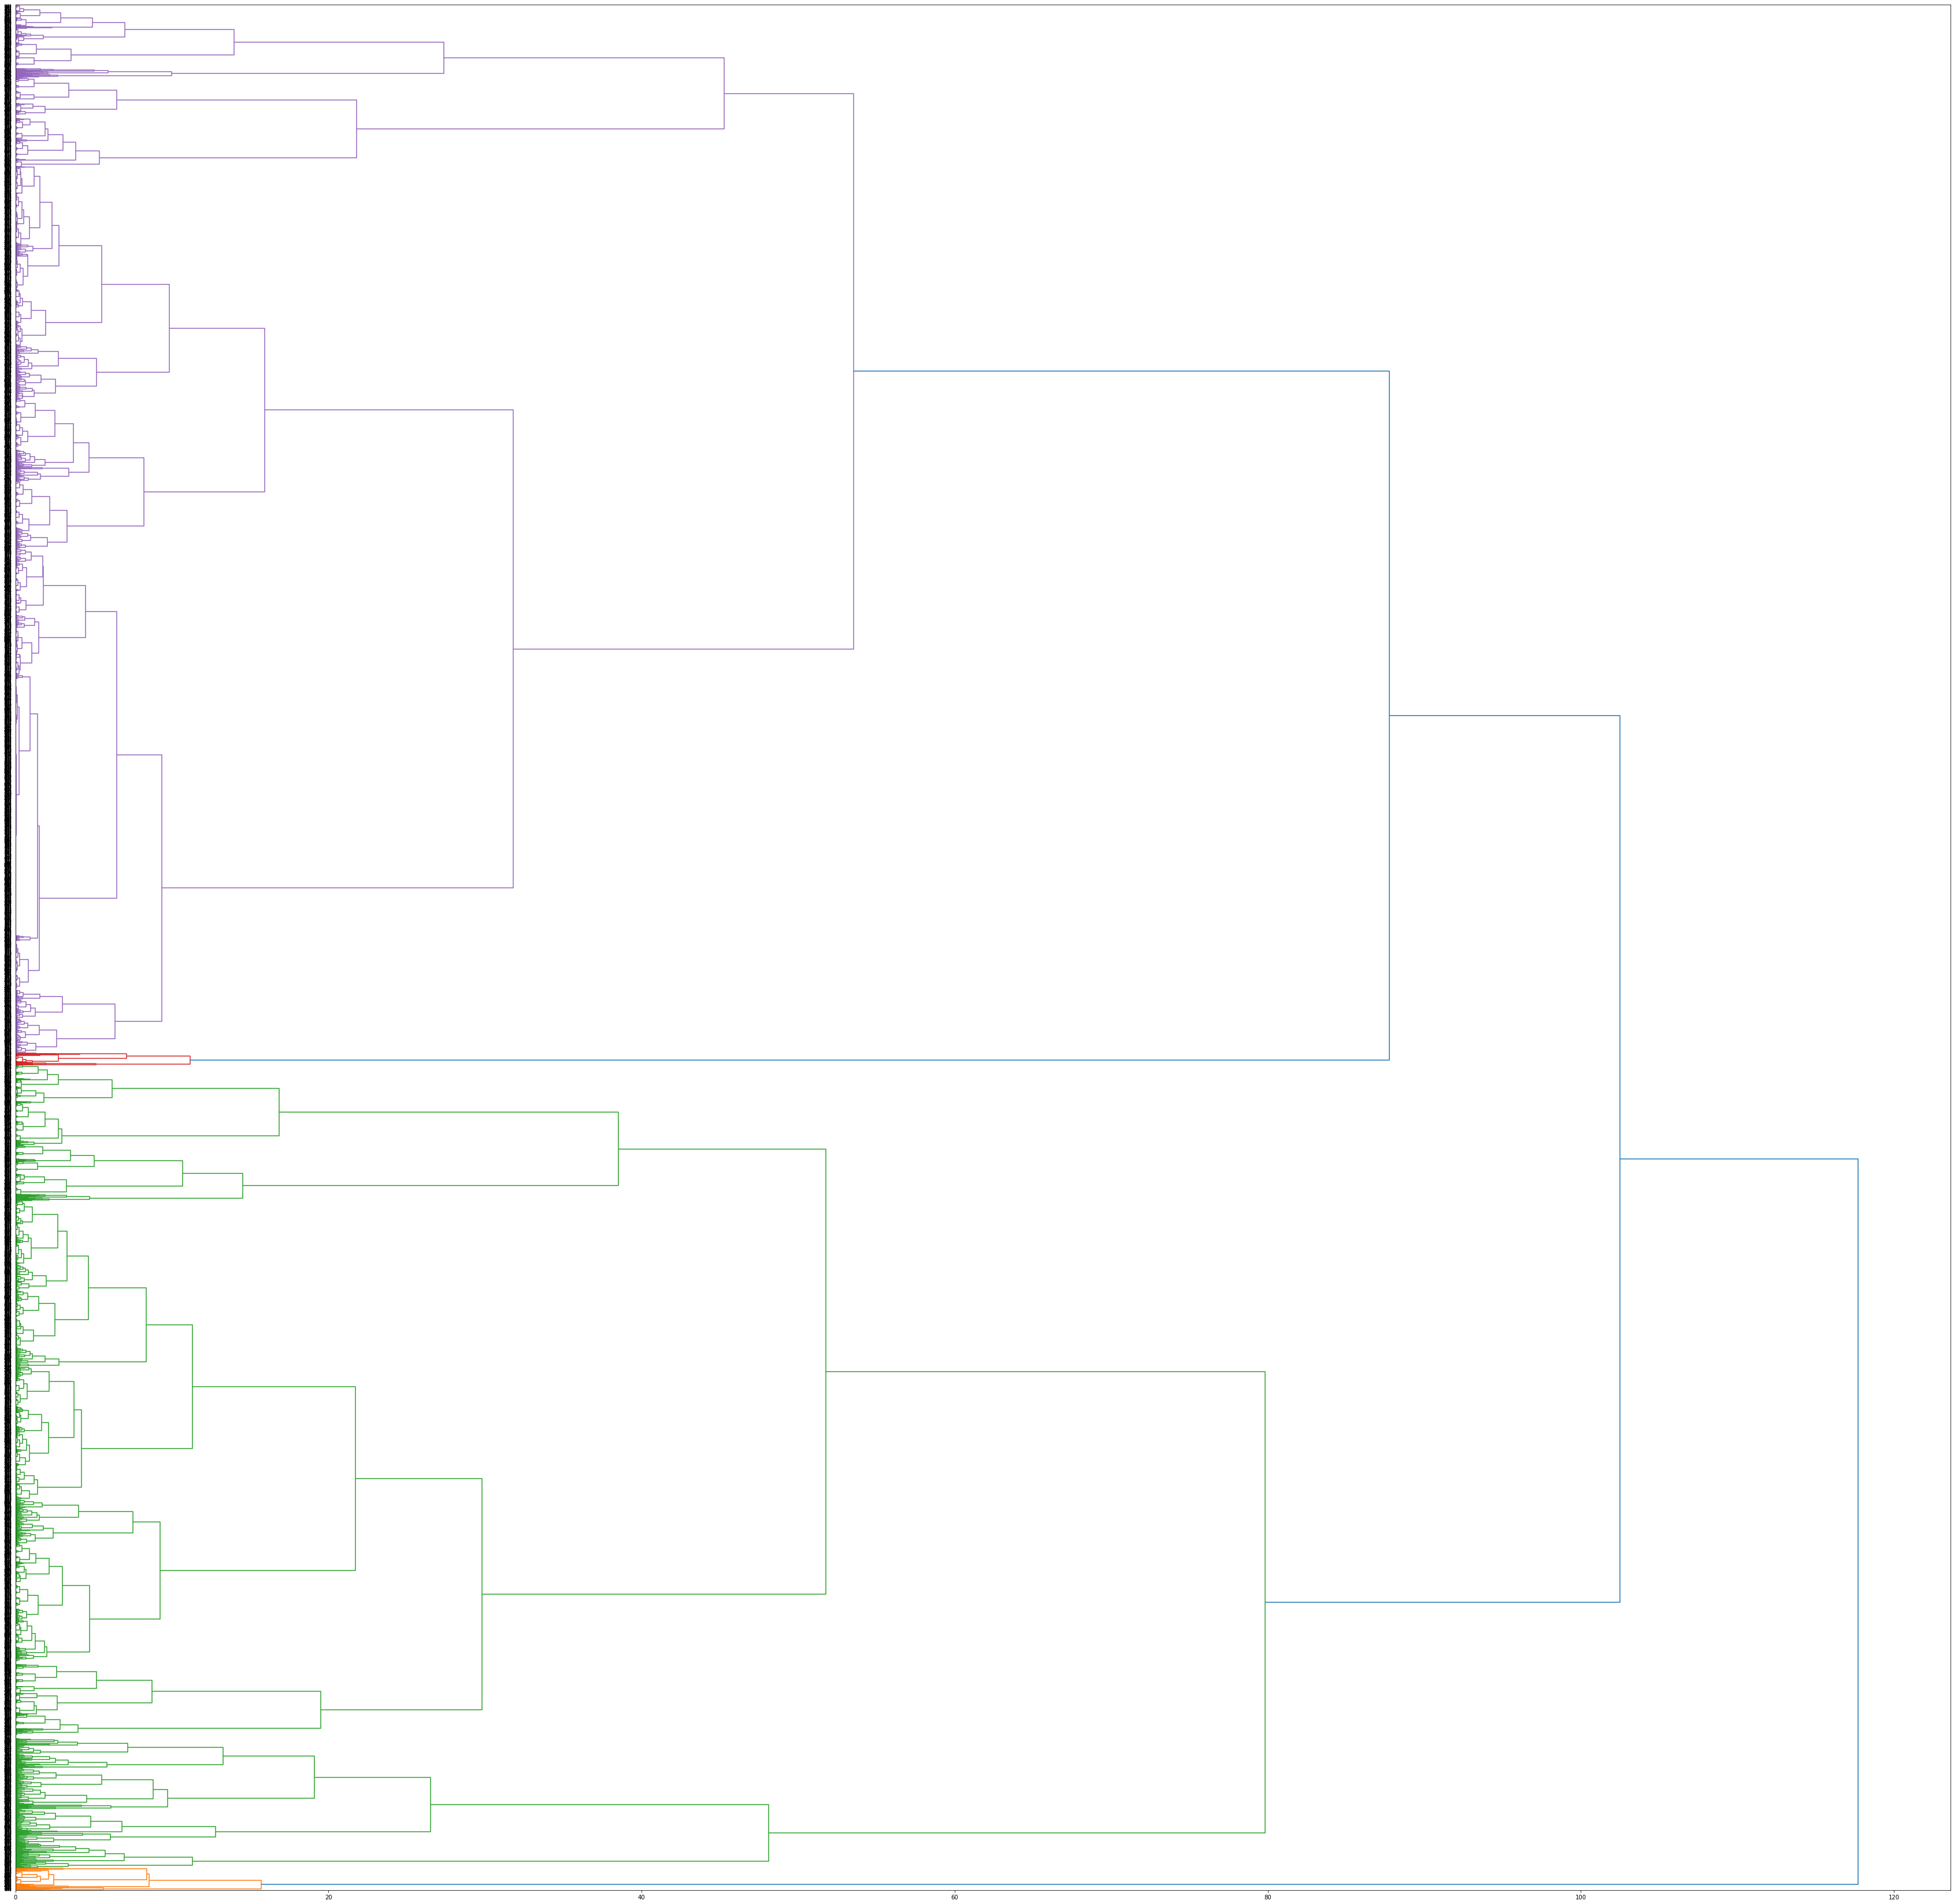

In [14]:
plt.subplots(figsize = (60,60))
dn = dendrogram(link, orientation = 'right')